In [1]:
!pip install xlrd

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Suppress display of warnings
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset
df = pd.read_excel("D:\Arun Lahiri\Education\Datamites\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [3]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [5]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [6]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

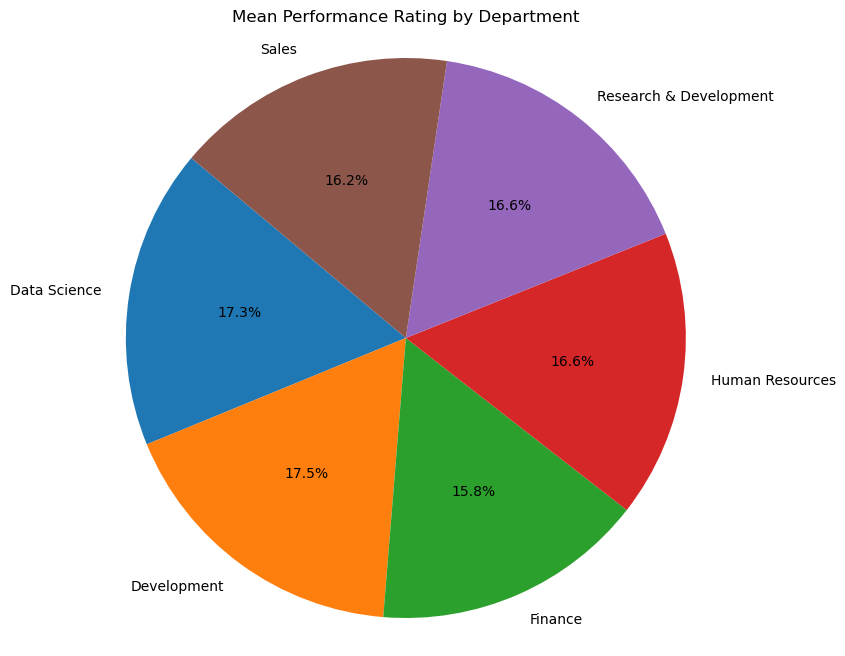

In [7]:
import matplotlib.pyplot as plt

# Grouping by department and calculating mean performance rating
dept_performance_mean = df.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

# Plotting a pie chart
plt.figure(figsize=(10, 8))
plt.pie(dept_performance_mean['PerformanceRating'], labels=dept_performance_mean['EmpDepartment'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mean Performance Rating by Department')
plt.show()


## Education level vs Attrition

<Axes: xlabel='EmpEducationLevel'>

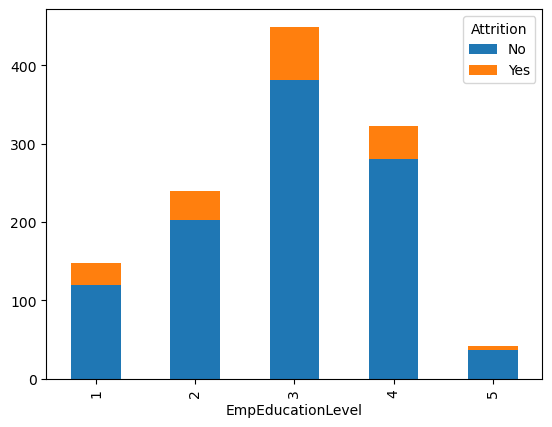

In [8]:
df.groupby('EmpEducationLevel')['Attrition'].value_counts().unstack().plot(kind='bar', stacked=True)

## Age Group vs Attrition

In [9]:
df['AgeGroup'] = pd.cut(df['Age'], [18, 25, 35, 45, 55, 65], labels=['18-24', '25-34', '35-44', '45-54', '55-64'])
max_attrition_age_group = df.loc[df['Attrition'] == 'Yes', 'AgeGroup'].value_counts().idxmax()
max_attrition_age_group

'25-34'

## Experience vs Attrition

In [10]:
# Calculate the statistics
exp_statistics = df[['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole']].agg(['mean', 'median', 'max'])
exp_statistics

,TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole
mean,11.33,7.0775,4.291667
median,10.00,5.0000,3.000000
max,40.00,40.0000,18.000000


## Performace Ratings by Departmentwise

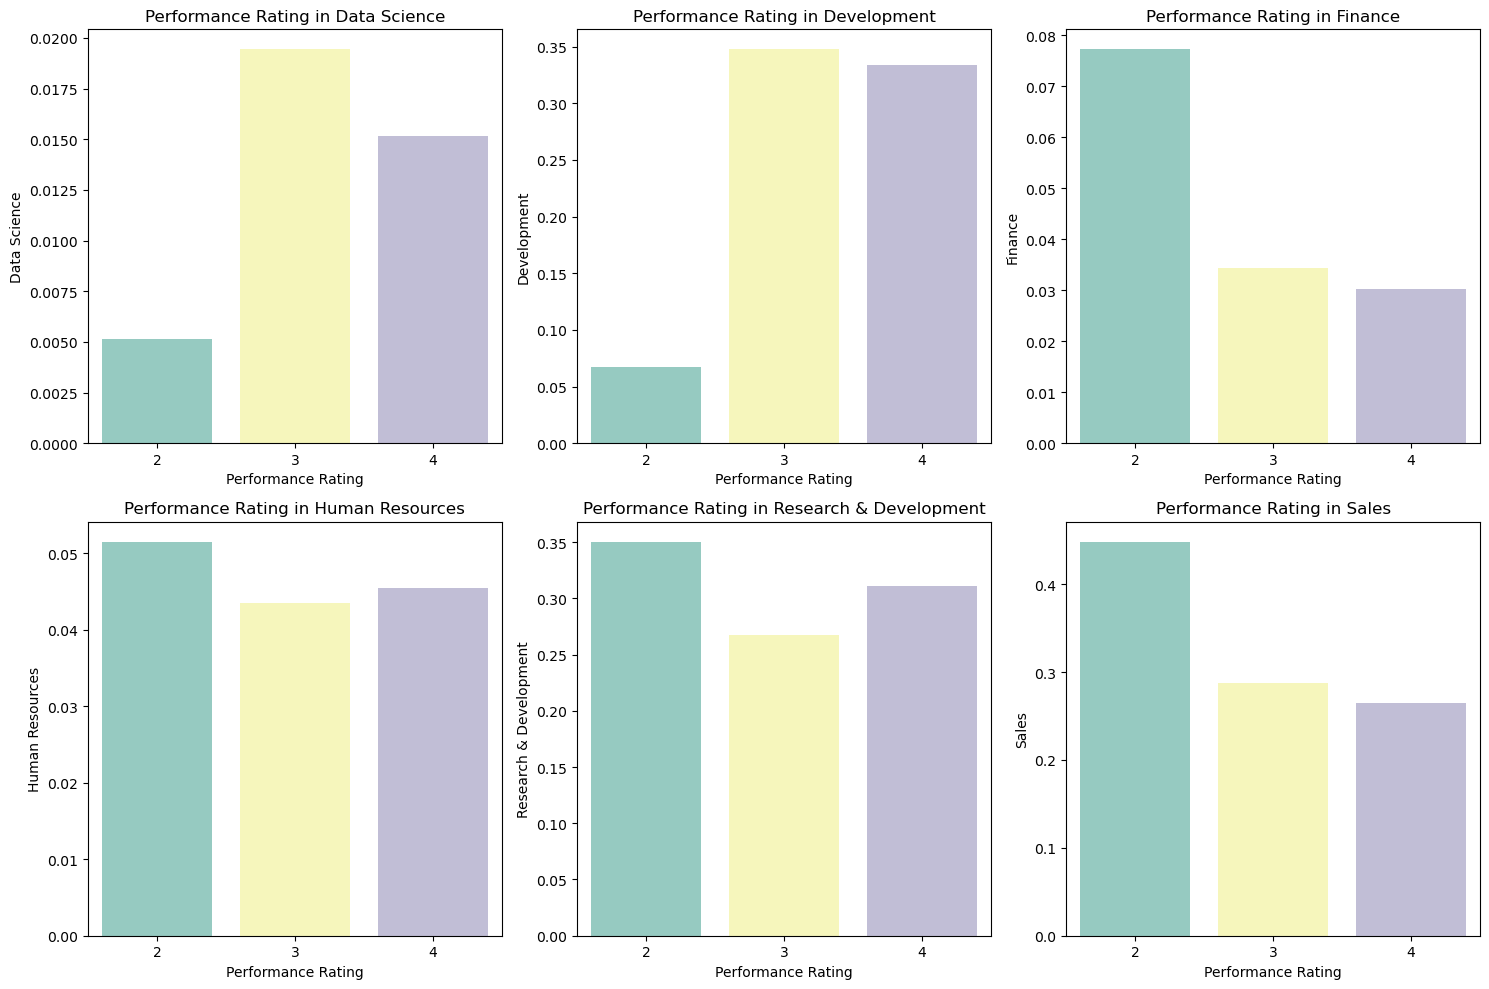

In [61]:
# Grouped bar plot for department-wise performance ratings
plt.figure(figsize=(15, 10))

departments = dept_rating.columns[:-1]  # Extract department names from DataFrame columns

for i, department in enumerate(departments, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='PerformanceRating', y=department, data=dept_rating, ci=None, palette='Set3')
    plt.xlabel('Performance Rating')
    plt.ylabel(department)
    plt.title(f'Performance Rating in {department}')

plt.tight_layout()
plt.show()

## Heat map and Co-relation map

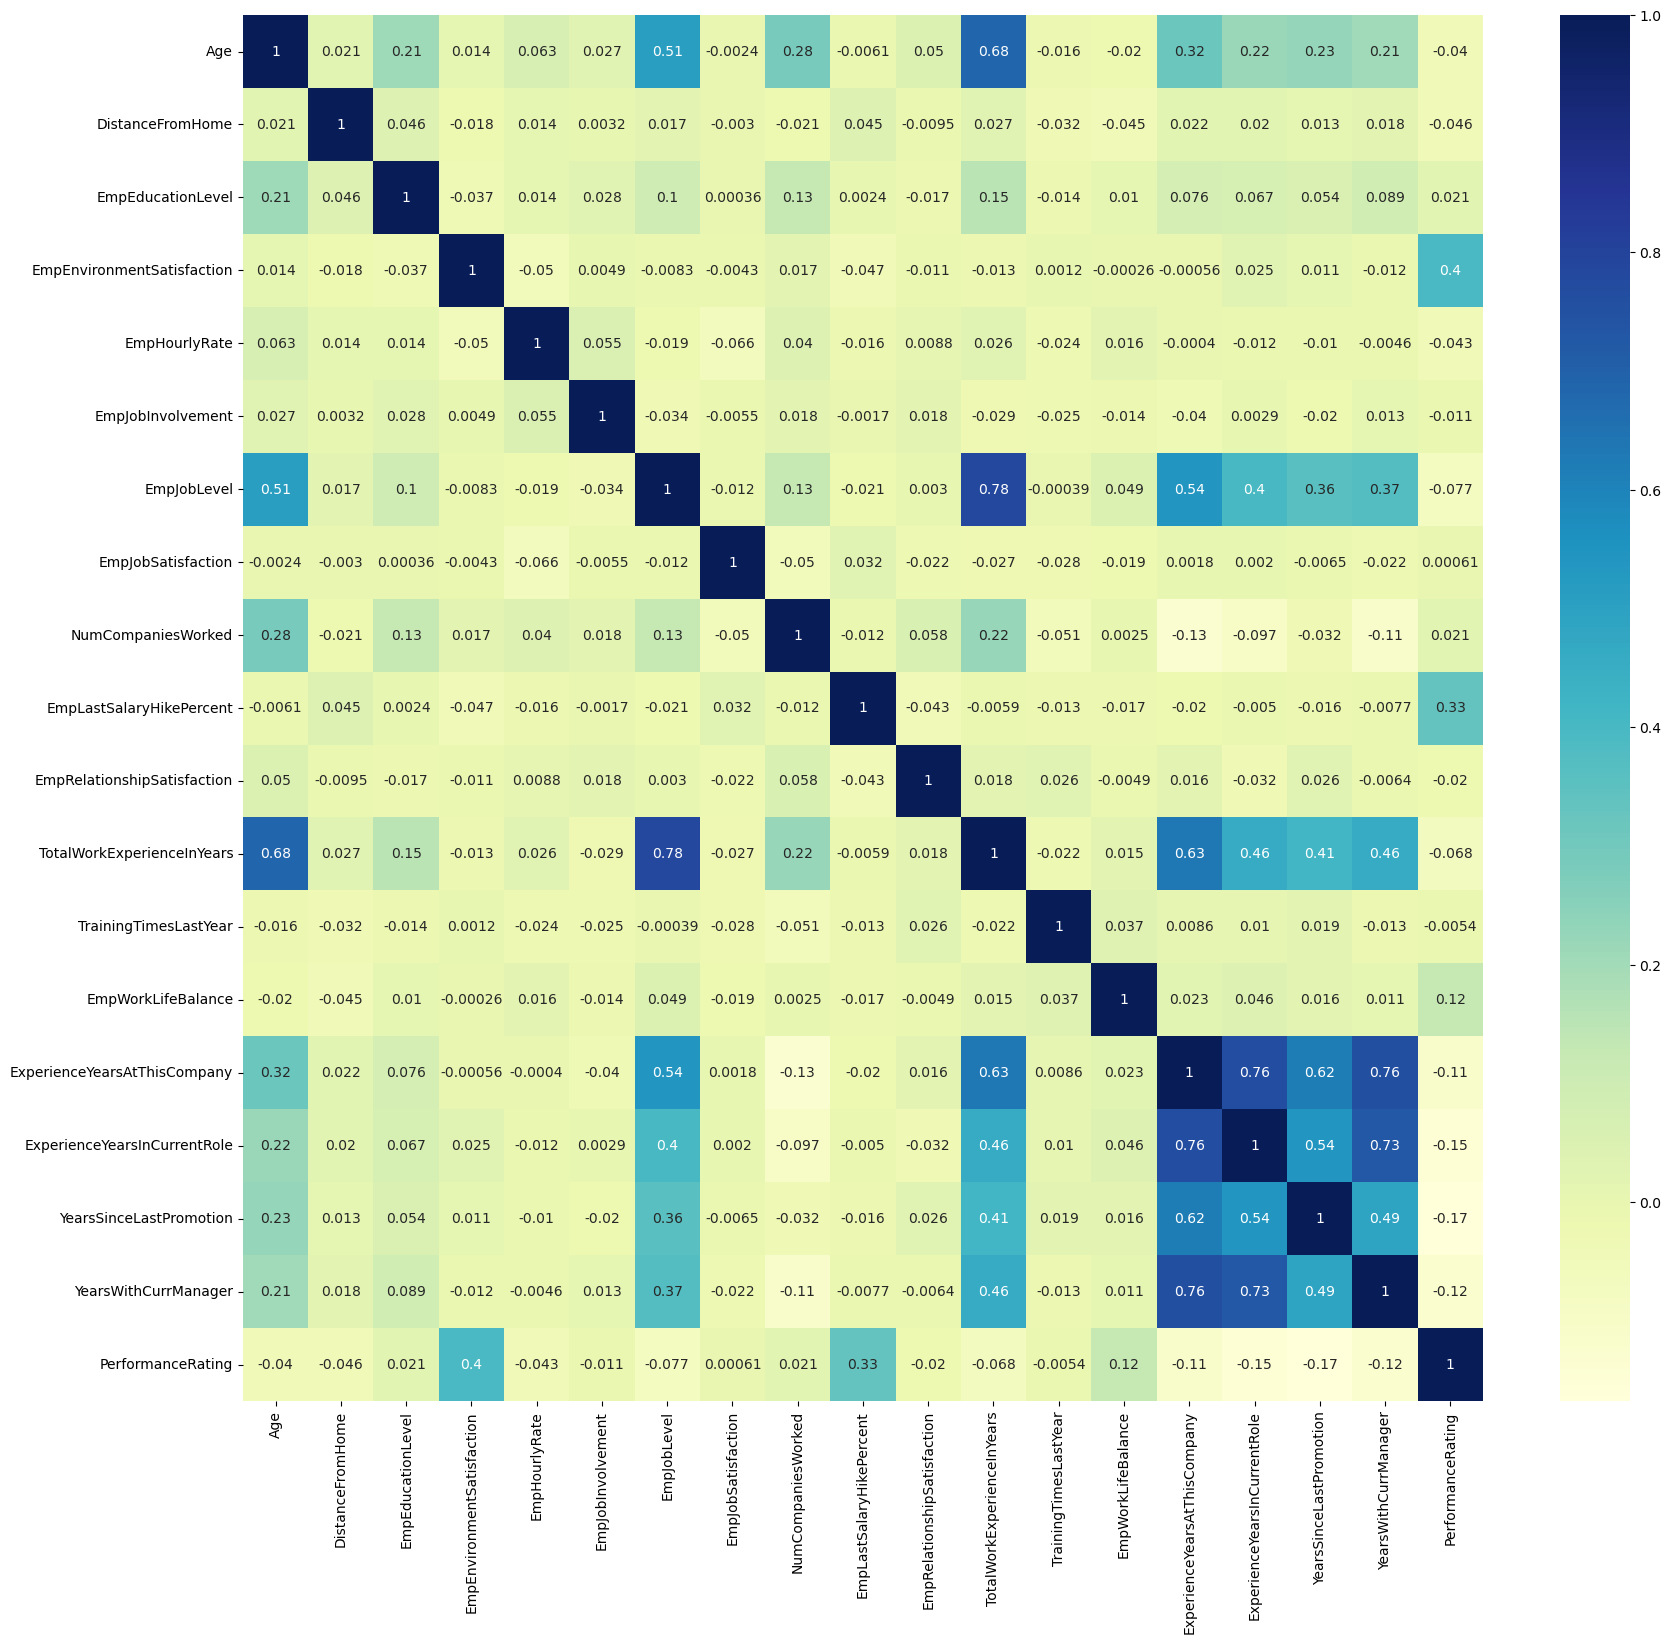

In [11]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

## Data Cleaning

In [12]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2, 3, 4, 5, 6, 7, 16, 26):
    df.iloc[:, i] = enc.fit_transform(df.iloc[:, i])

df.corr()

# Selected only the important columns
y = df.PerformanceRating
X = df.iloc[:, [4, 5, 9, 16, 20, 21, 22, 23, 24]]  # Taking only variables with correlation coefficient greater than 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encode target classes using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

## Count vs Dependent Variable

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'EducationBackground'}>,
        <Axes: title={'center': 'MaritalStatus'}>,
        <Axes: title={'center': 'EmpDepartment'}>],
       [<Axes: title={'center': 'EmpJobRole'}>,
        <Axes: title={'center': 'BusinessTravelFrequency'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'EmpEducationLevel'}>,
        <Axes: title={'center': 'EmpEnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'EmpHourlyRate'}>,
        <Axes: title={'center': 'EmpJobInvolvement'}>,
        <Axes: title={'center': 'EmpJobLevel'}>,
        <Axes: title={'center': 'EmpJobSatisfaction'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'EmpLastSalaryHikePercent'}>,
        <Axes: title={'center': 'EmpRelationshipSatisfaction'}>,
        <Axes: title={'center':

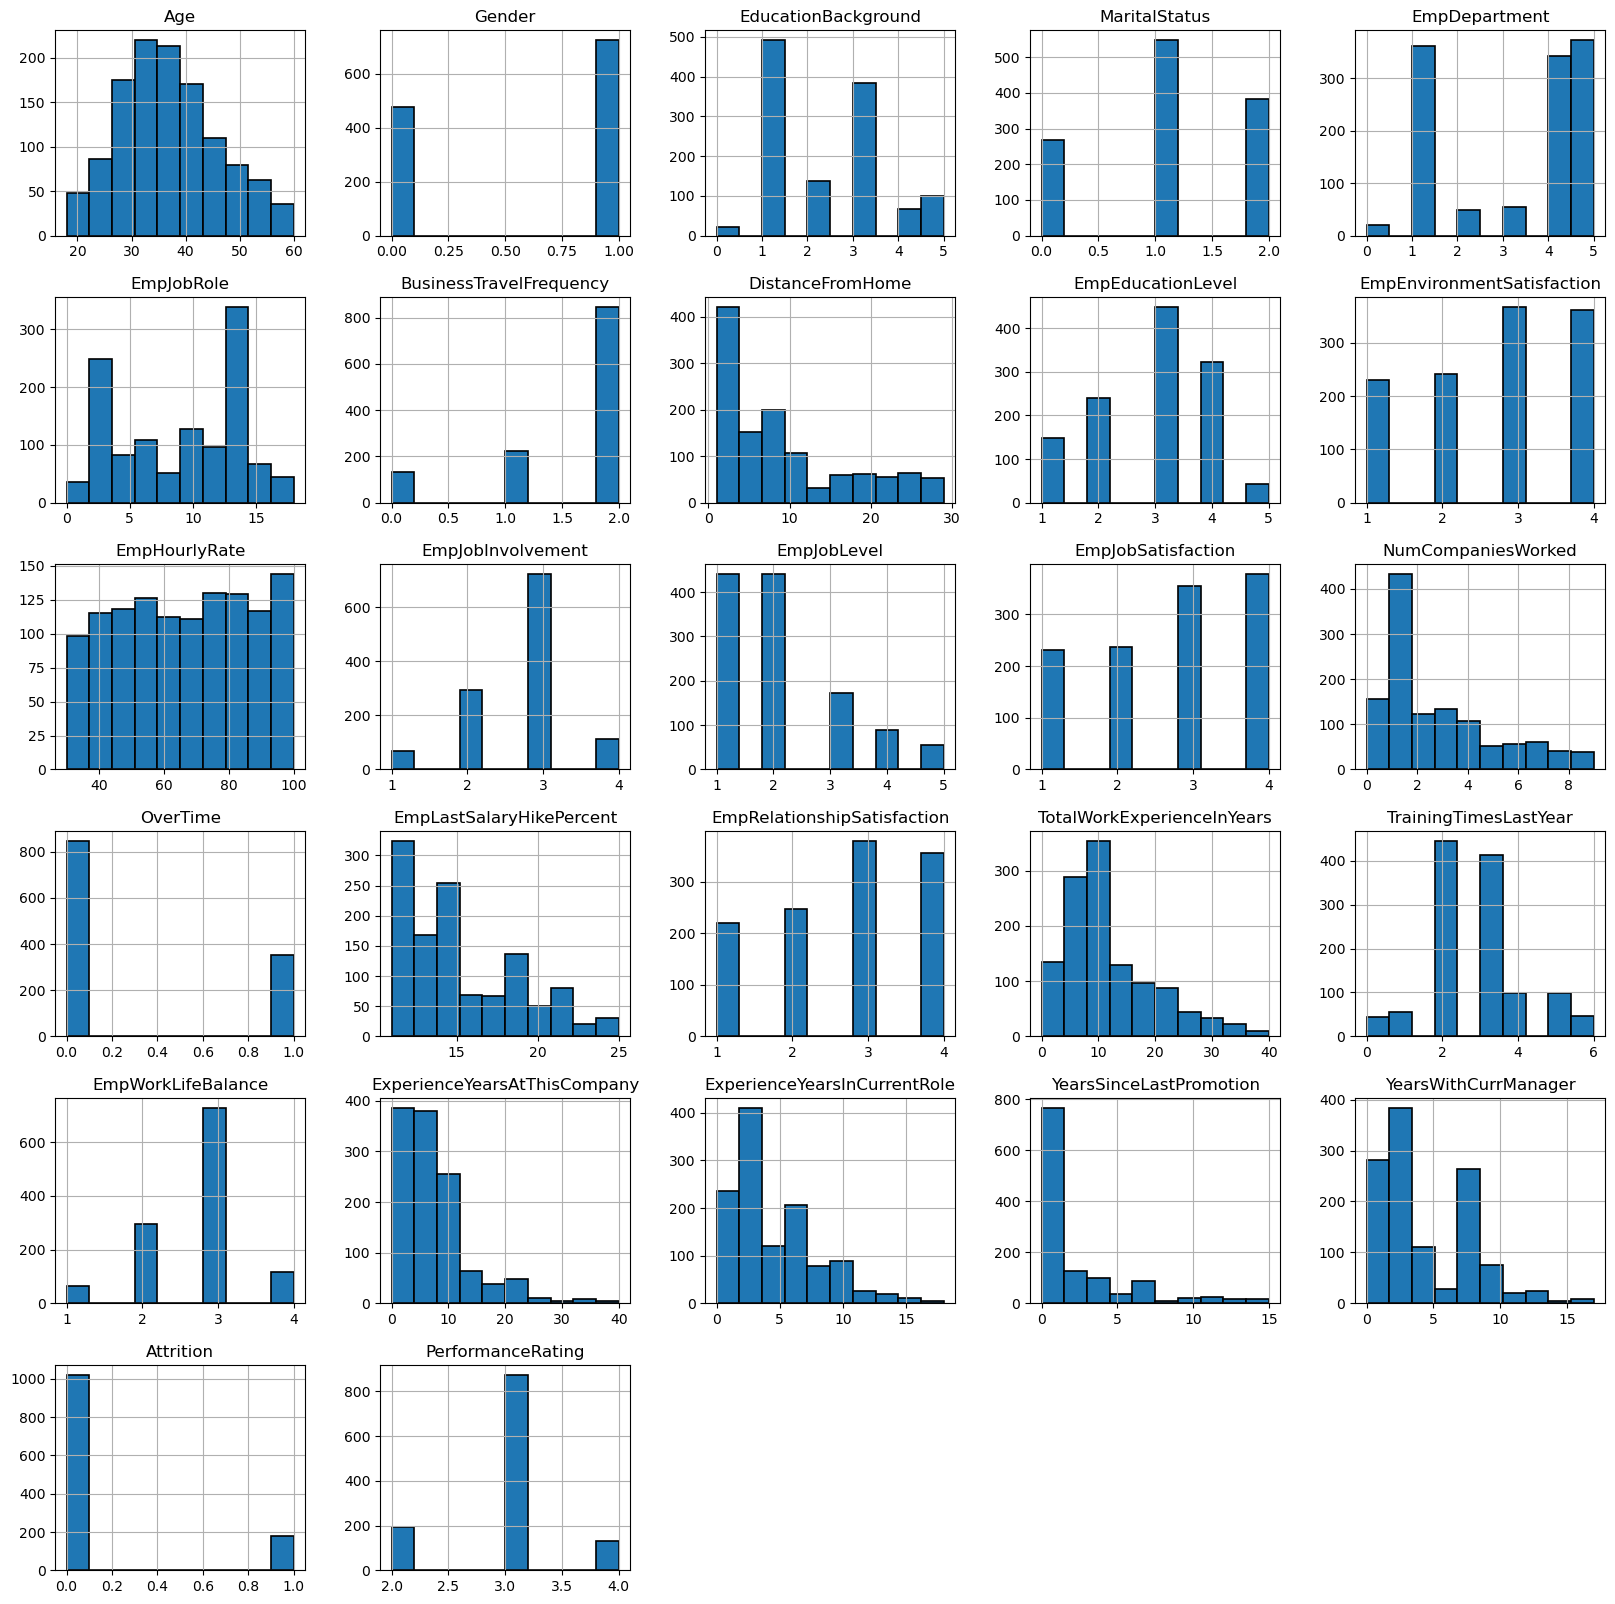

In [13]:
# Create subplots for each numerical column
df.hist(edgecolor= 'black',linewidth=1.2, figsize=(20,20))

## Model selection

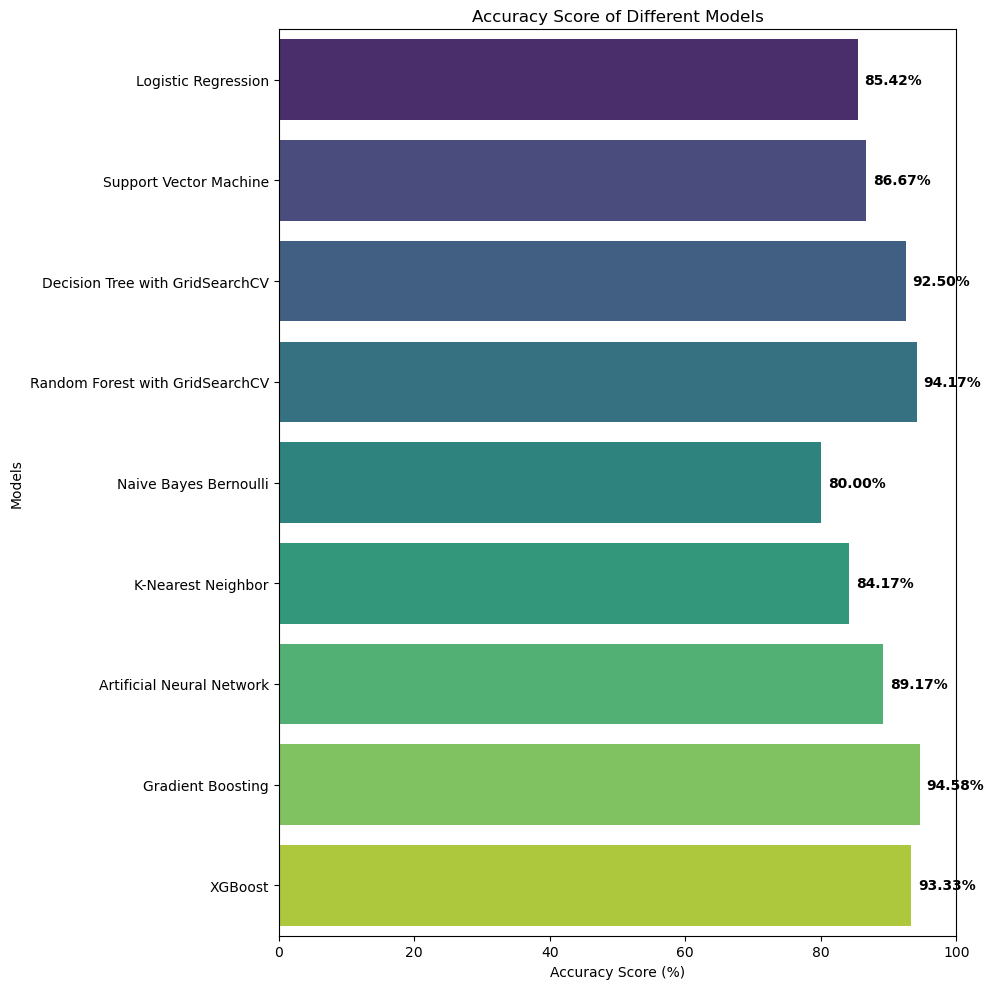

In [47]:
# Plotting accuracy scores in a horizontal bar plot

plt.figure(figsize=(10, 10))
ax = sns.barplot(y=model_names, x=accuracy_scores_percentage, palette='viridis')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Models')
plt.title('Accuracy Score of Different Models')
plt.xlim(0, 100)  # Limit x-axis to 100 for percentage
for i, v in enumerate(accuracy_scores_percentage):
    ax.text(v + 1, i, f'{v:.2f}%', ha='left', va='center', color='black', fontweight='bold')

plt.tight_layout()
plt.show()